## Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [466]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [467]:
# Disabling Warning
import warnings
warnings.simplefilter('ignore')

In [468]:
df = pd.read_csv("cubic_zirconia.csv")

### 1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [469]:
# Checking Head data
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [470]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [471]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [472]:
# Removing "Unnamed: 0" from dataset
df.drop('Unnamed: 0', axis = 1,inplace =True)

In [473]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [474]:
df.shape

(26967, 10)

In [475]:
df.duplicated().sum()

34

In [476]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [477]:
# Dropping duplicated Records
df.drop_duplicates(inplace=True)

In [478]:
# Renaming x, y, and z to meaningful feature names

df.rename(columns = {'x':'length'}, inplace = True) 
df.rename(columns = {'y':'width'}, inplace = True) 
df.rename(columns = {'z':'height'}, inplace = True) 

In [479]:
df.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [480]:
# Data describe

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933.0,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26236.0,NaN,NaN,NaN,61.745285,1.412243,50.8,61.0,61.8,62.5,73.6
table,26933.0,NaN,NaN,NaN,57.45595,2.232156,49.0,56.0,57.0,59.0,79.0
length,26933.0,NaN,NaN,NaN,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
width,26933.0,NaN,NaN,NaN,5.733102,1.165037,0.0,4.71,5.7,6.54,58.9
height,26933.0,NaN,NaN,NaN,3.537769,0.719964,0.0,2.9,3.52,4.04,31.8
price,26933.0,NaN,NaN,NaN,3937.52612,4022.551862,326.0,945.0,2375.0,5356.0,18818.0


In [481]:
# Outlier Proportion
def outlier_values(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [482]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns; # Gives all columns
for i in num_cols:
    ll,ul = outlier_values(df[i])
    oc = df[(df[i]<ll) | (df[i]>ul)][i].count()
    total = df[i].count()
    print("{0}\t{1}\t{2}".format(i,oc,oc*100/total))
    #print("Skewness on {0}: {1}".format(i,skew(df[i])))

carat	657	2.4393866260721047
depth	1219	4.646287543832901
table	318	1.1807076820257676
length	14	0.05198084134704638
width	14	0.05198084134704638
height	22	0.0816841792596443
price	1778	6.60156685107489


In [483]:
from scipy.stats import skew, kurtosis
for i in num_cols:
    print("{0}\t{1}\t{2}".format(i,skew(df[i], nan_policy='omit'), kurtosis(df[i], nan_policy='omit')))

carat	1.114727014791487	1.2103977882412957
depth	-0.02608446909864724	3.681179586416939
table	0.7657624212663035	1.5831931325568656
length	0.3922679825424859	-0.6792953569818212
width	3.867548673410656	160.012981470661
height	2.5805209384040535	87.40684883919809
price	1.6190253501299428	2.1519310085654473


#### Data Analysis

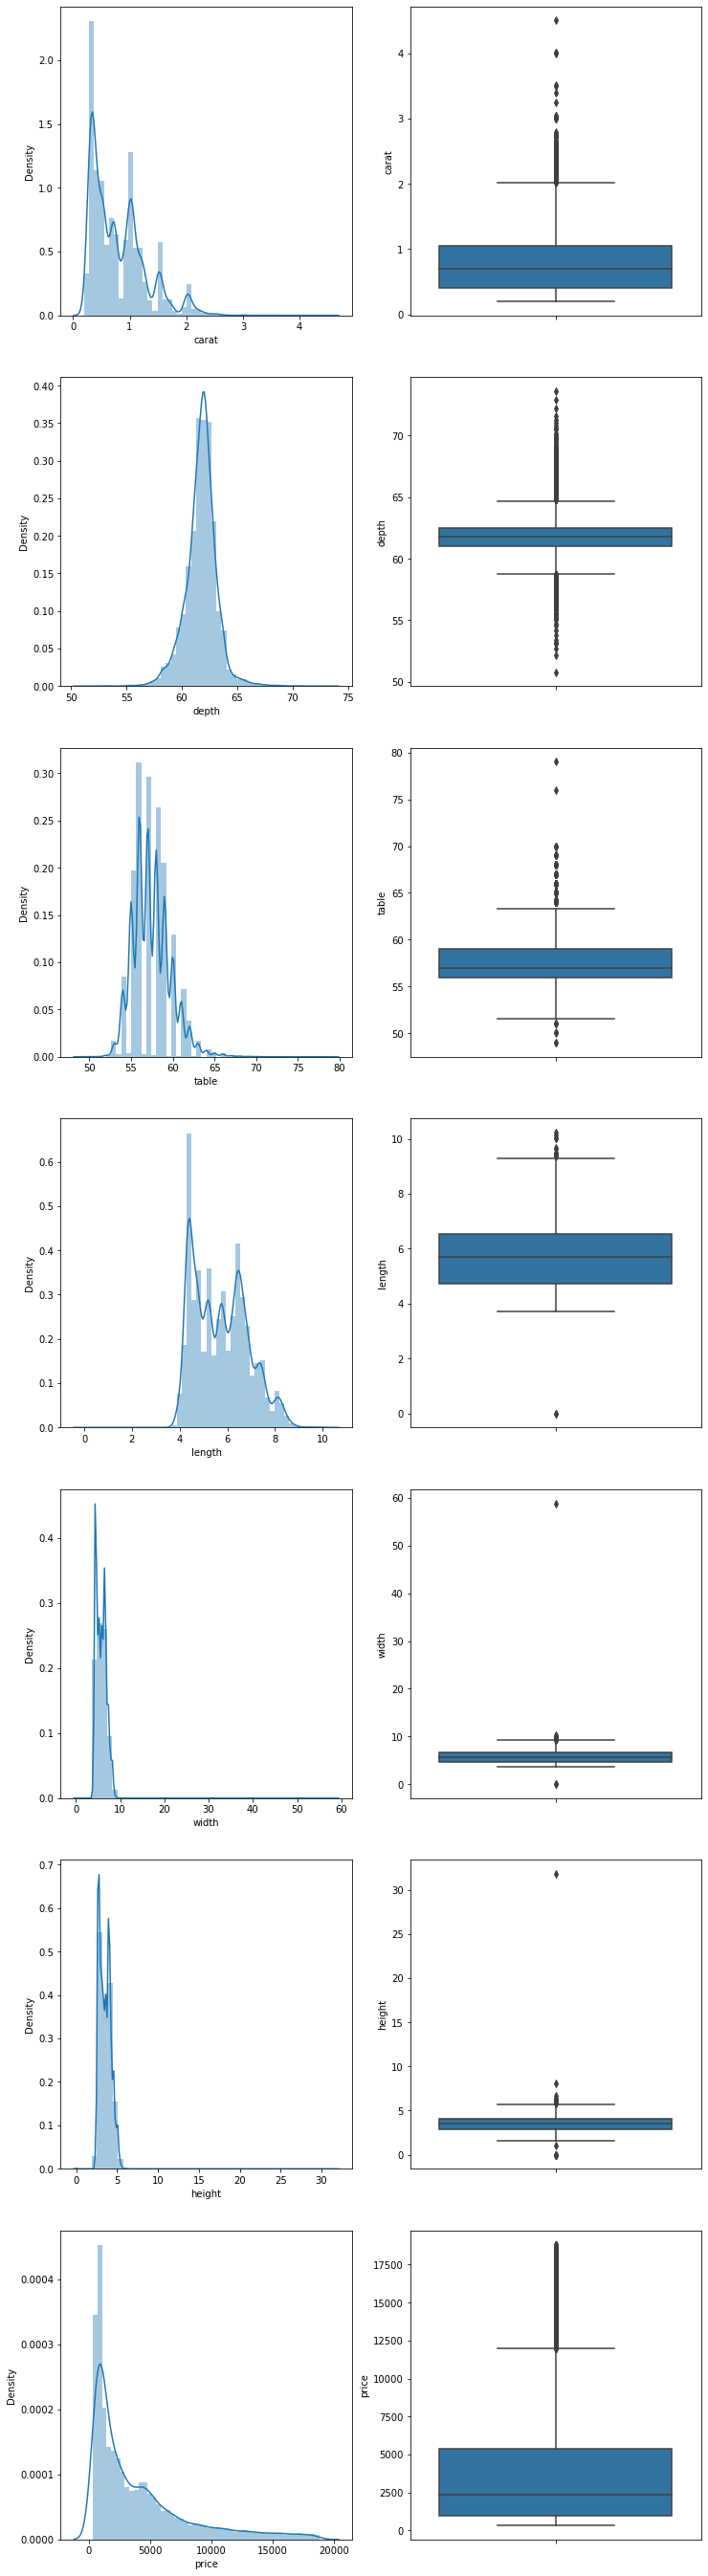

In [484]:
# Univariate Analysis
num_cols = df.select_dtypes(include = ['int64','float64']).columns; # Gives all columns

plt.figure(figsize=(12,120))
for i in range(0,len(num_cols)):
    plt.subplot(17,2,2*i+1)
    sns.distplot(x = df[num_cols[i]], axlabel = num_cols[i]);
    
    plt.subplot(17,2,2*i+2)
    sns.boxplot(y = df[num_cols[i]]);

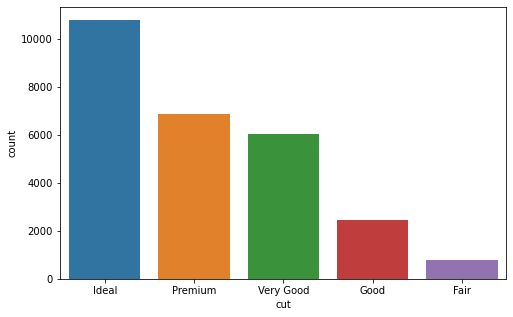

In [485]:
plt.figure(figsize=(8,5))
sns.countplot(df['cut'], order = ['Ideal','Premium','Very Good','Good','Fair']);

In [486]:
df.cut.value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

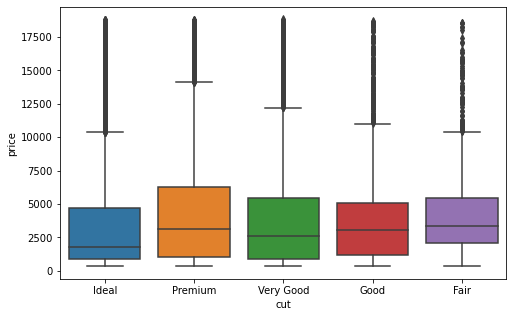

In [487]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df.price, x=df.cut);

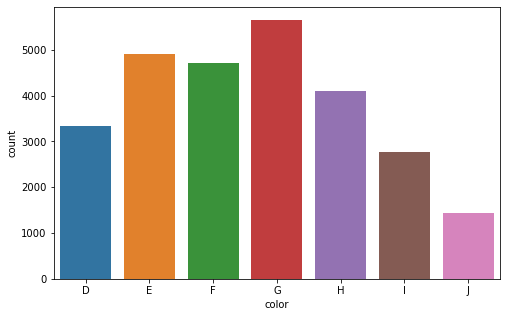

In [488]:
plt.figure(figsize=(8,5))
sns.countplot(df['color'], order = ['D','E','F','G','H','I','J']);

In [489]:
df.color.value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

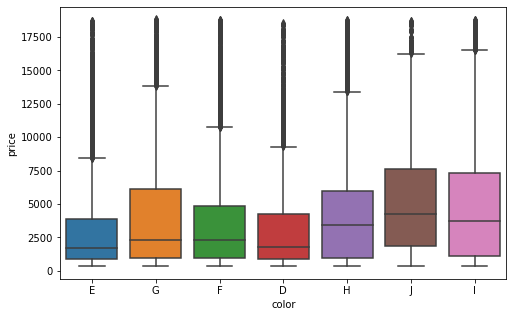

In [490]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df.price, x=df.color);

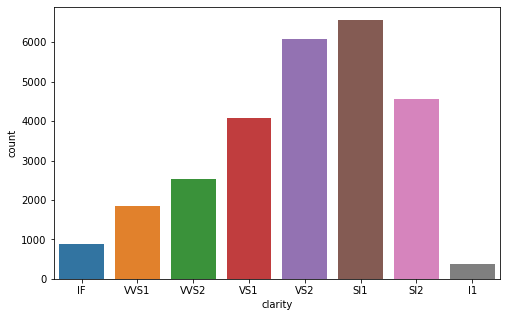

In [491]:
plt.figure(figsize=(8,5))
sns.countplot(df['clarity'], order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']);

In [492]:
df.clarity.value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

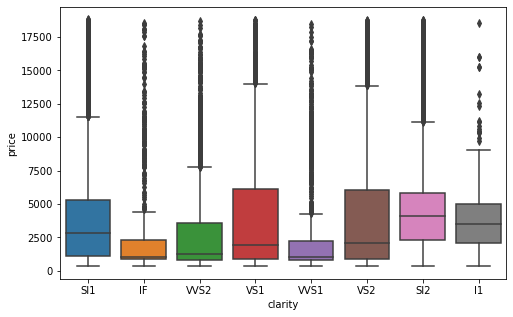

In [493]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df.price, x=df.clarity);

In [494]:
df['cut'] = df['cut'].replace({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1});
df['color'] = df['color'].replace({'D':1,'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7});
df['clarity'] = df['clarity'].replace({'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1': 6, 'SI2':7, 'I1':8});

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   length   26933 non-null  float64
 7   width    26933 non-null  float64
 8   height   26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


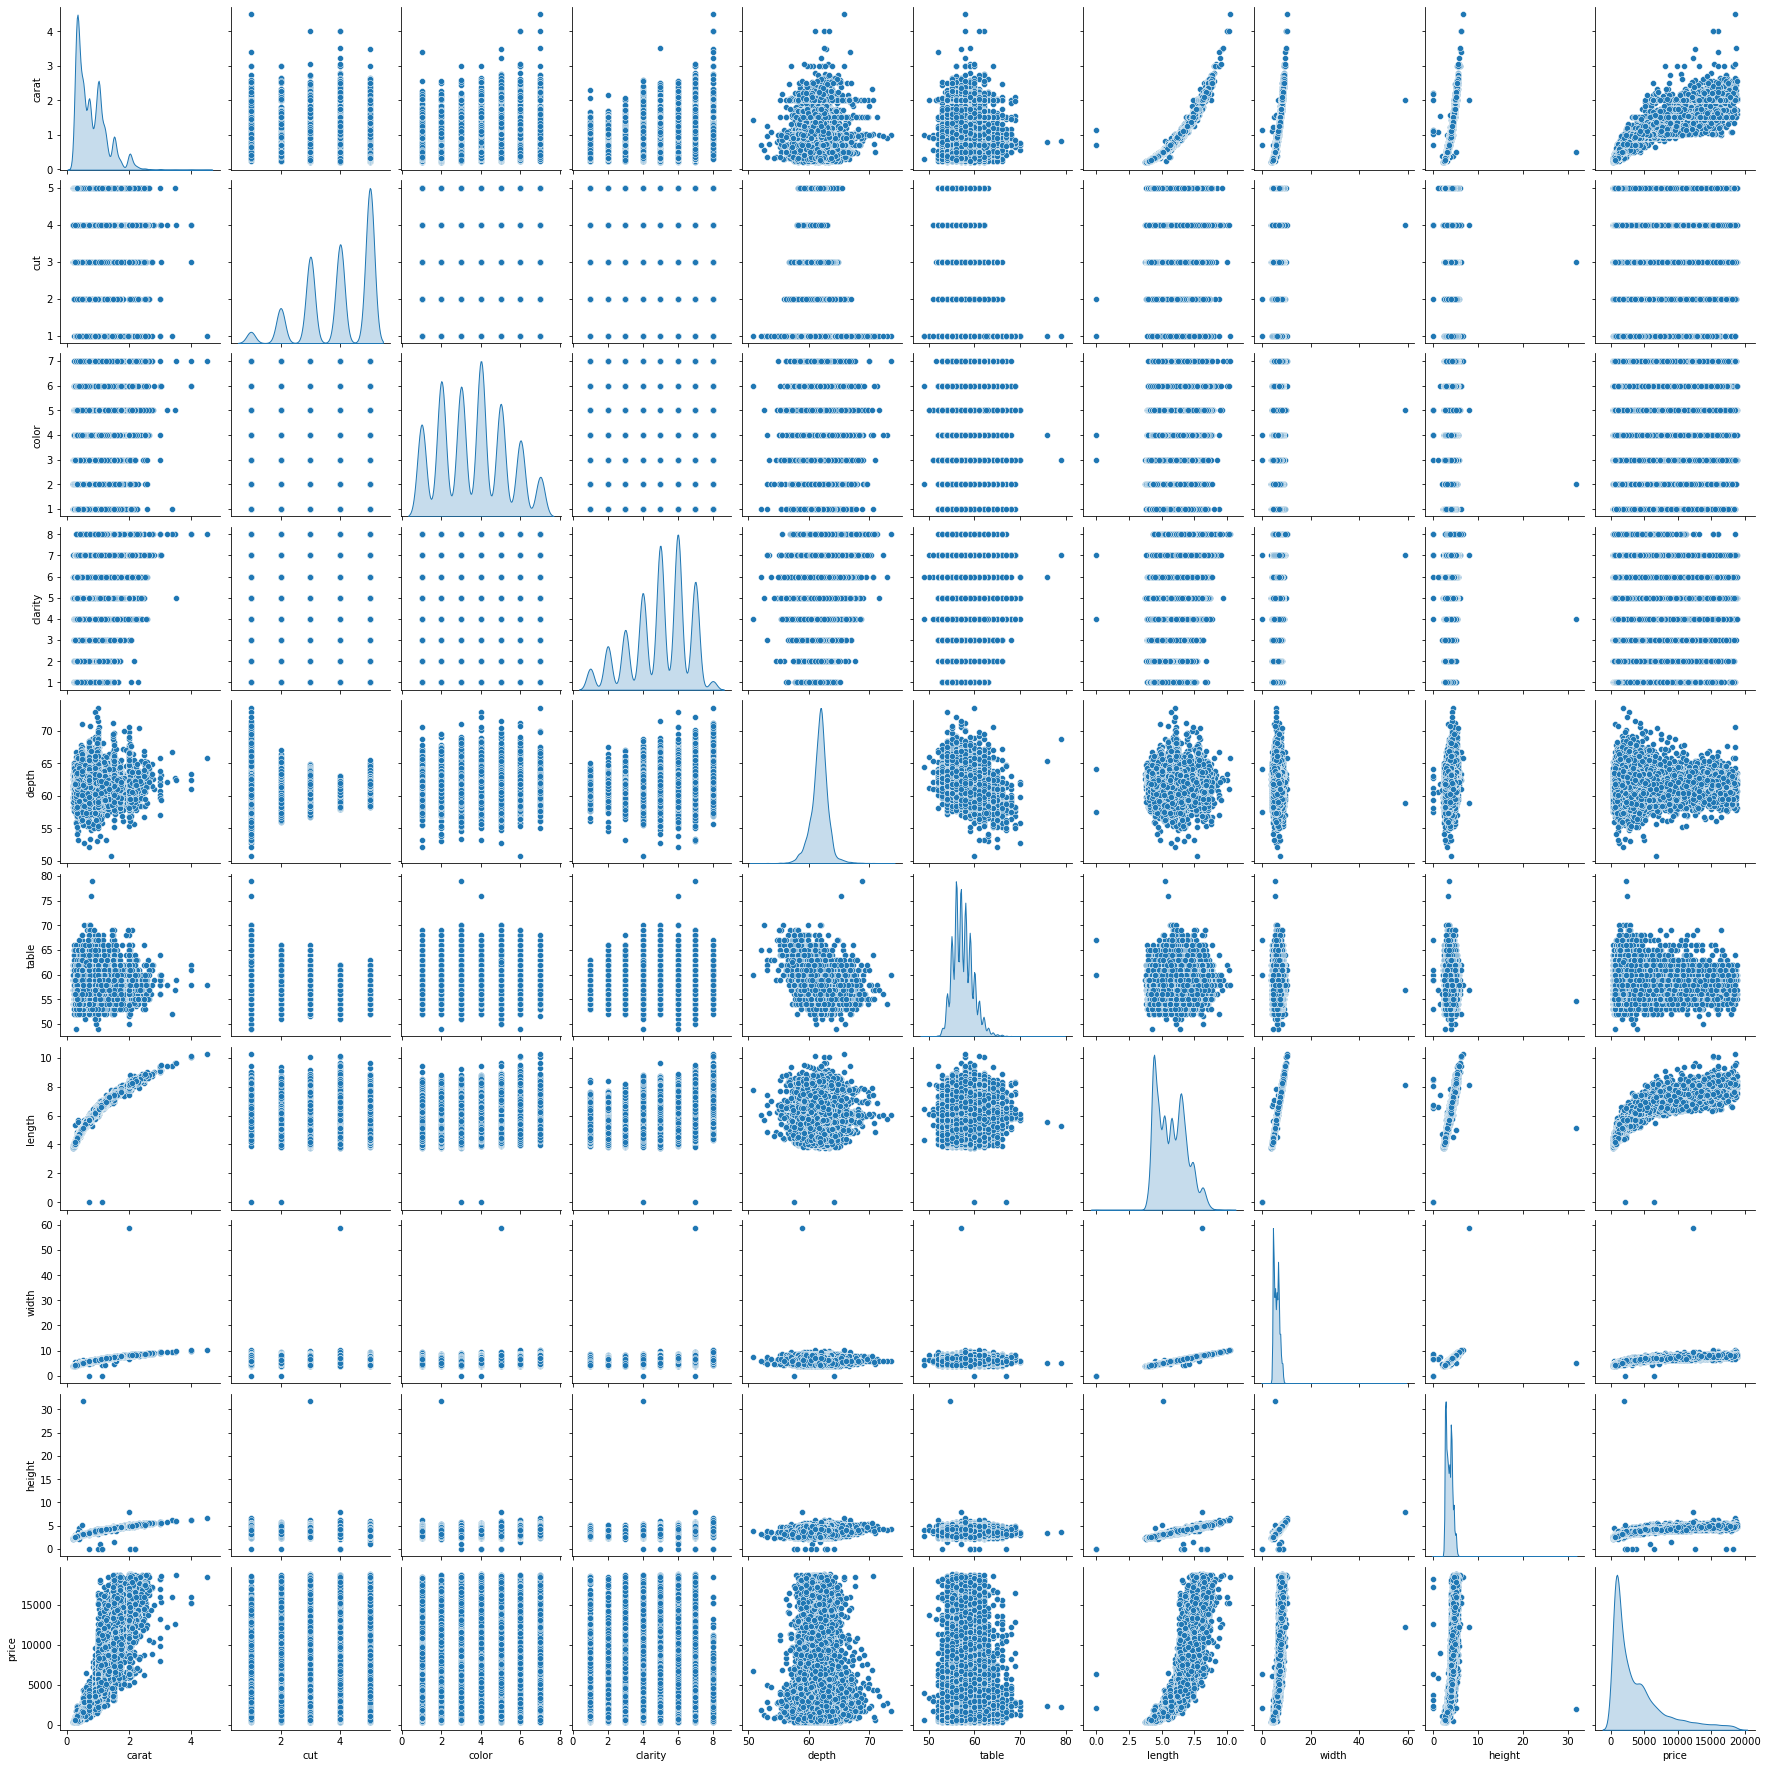

In [496]:
sns.pairplot(df, diag_kind='kde');

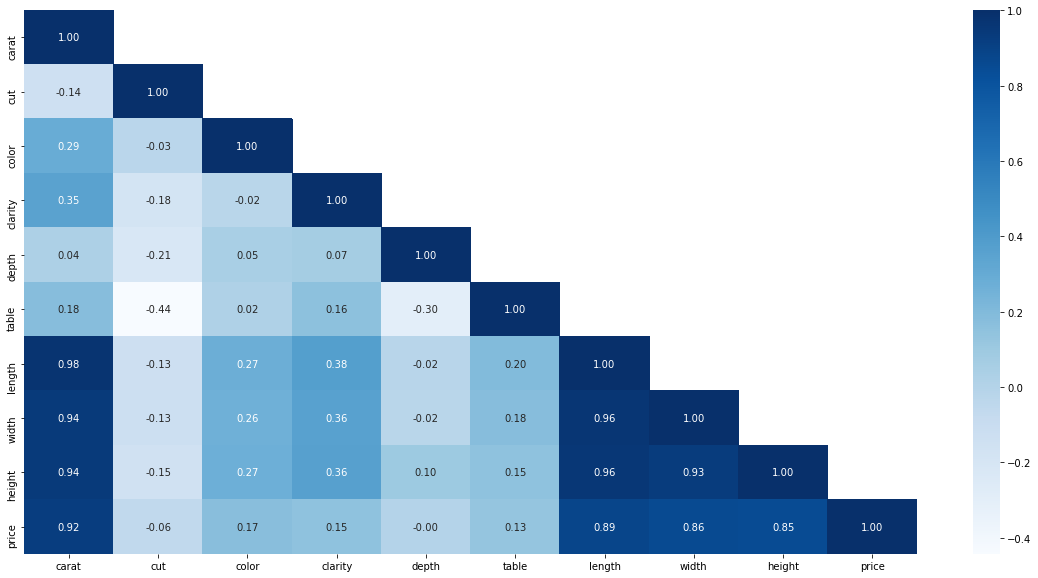

In [497]:
corr = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt = '.2f', mask = np.triu(corr,+1), cmap='Blues');

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning, or do we need to change them or drop them? Check for the possibility of combining the sub levels of an ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning

In [498]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
length       0
width        0
height       0
price        0
dtype: int64

In [499]:
df['depth'] = df['depth'].fillna(np.mean(df['depth']))

In [500]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
length     0
width      0
height     0
price      0
dtype: int64

In [501]:
def count_zeros(col):
    return df[df[col]==0][col].count()

In [502]:
for col in df.columns:
    print(col, count_zeros(col))

carat 0
cut 0
color 0
clarity 0
depth 0
table 0
length 2
width 2
height 8
price 0


In [503]:
df['length'] = np.where(df['length']==0, np.median(df['length']), df['length'])
df['width'] = np.where(df['width']==0, np.median(df['width']), df['width'])
df['height'] = np.where(df['height']==0, np.median(df['height']), df['height'])

In [504]:
for col in df.columns:
    print(col, count_zeros(col))

carat 0
cut 0
color 0
clarity 0
depth 0
table 0
length 0
width 0
height 0
price 0


In [505]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.20,0.40,0.70,1.05,4.50
cut,26933.0,3.909702,1.113165,1.00,3.00,4.00,5.00,5.00
color,26933.0,3.605206,1.705883,1.00,2.00,4.00,5.00,7.00
clarity,26933.0,4.946423,1.646749,1.00,4.00,5.00,6.00,8.00
depth,26933.0,61.745285,1.393848,50.80,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.00,56.00,57.00,59.00,79.00
length,26933.0,5.729769,1.126285,3.73,4.71,5.69,6.55,10.23
width,26933.0,5.733525,1.163989,3.71,4.72,5.70,6.54,58.90
height,26933.0,3.538815,0.717377,1.07,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.00,945.00,2375.00,5356.00,18818.00


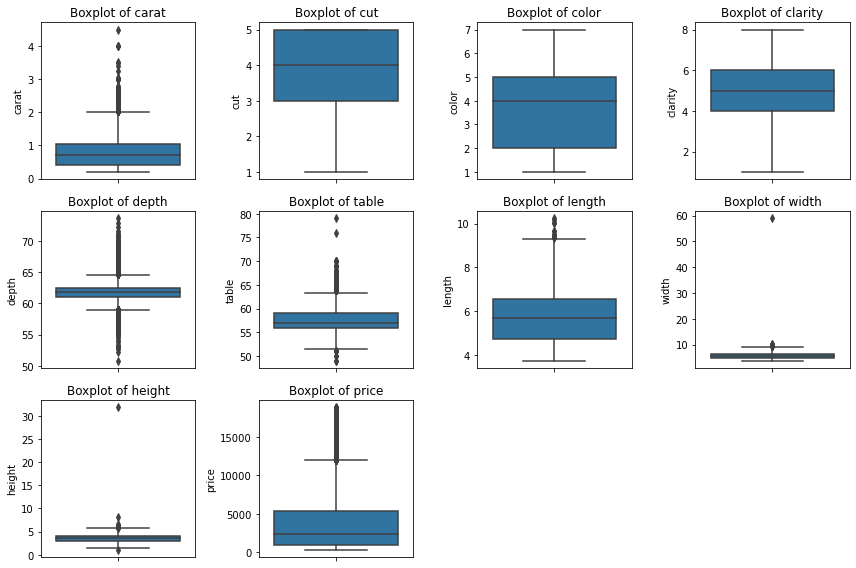

In [506]:
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [507]:
df['clarity'] = np.where(df['clarity'].isin([2,3]),2,df['clarity'])
df['clarity'] = np.where(df['clarity'].isin([4,5]),3,df['clarity'])
df['clarity'] = np.where(df['clarity'].isin([6,7]),4,df['clarity'])
df['clarity'] = np.where(df['clarity']==8,5,df['clarity'])

In [508]:
df.clarity.value_counts()

4    11129
3    10180
2     4369
1      891
5      364
Name: clarity, dtype: int64

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [509]:
df.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,5,2,4,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,3,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779


In [510]:
# Train test split
from sklearn.model_selection import train_test_split

X = df.drop('price',axis = 1)
y = df['price']

In [511]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=123)

In [512]:
# Sklearn Model
from sklearn.linear_model import LinearRegression

In [513]:
# Preparing Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [514]:
#Coefficients
pd.DataFrame(regression_model.coef_, X_train.columns, columns=['Coefficients'])

,Coefficients
carat,10917.373249
cut,108.136872
color,-314.192338
clarity,-899.728238
depth,-85.555598
table,-35.181439
length,-939.946983
width,7.213324
height,-29.033789


In [515]:
#Intercept
regression_model.intercept_

11577.556491184643

In [516]:
# Model score - R2 or coeff of determinant
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.9045846760784799
0.906093955832443


In [517]:
# Regularization to see updated score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [518]:
ridge = Ridge(alpha=.2, random_state = 123)
ridge.fit(X_train,y_train)

Ridge(alpha=0.2, random_state=123)

In [519]:
pd.DataFrame(ridge.coef_, X_train.columns, columns=['Coefficients'])

,Coefficients
carat,10904.278578
cut,108.155313
color,-314.112992
clarity,-899.862778
depth,-85.300080
table,-35.163766
length,-934.508887
width,7.242509
height,-29.085080


In [520]:
ridge.intercept_

11540.143298897043

In [521]:
lasso = Lasso(alpha=.2, random_state = 123)
lasso.fit(X_train,y_train)

Lasso(alpha=0.2, random_state=123)

In [522]:
pd.DataFrame(lasso.coef_, X_train.columns, columns=['Coefficients'])

,Coefficients
carat,10885.380049
cut,108.084571
color,-313.946042
clarity,-899.887374
depth,-85.009680
table,-35.132500
length,-925.233549
width,4.457600
height,-26.797675


In [523]:
lasso.intercept_

11489.982732899784

In [524]:
print("Train Data (Ridge) {0}".format(ridge.score(X_train, y_train)))
print("Test Data (Ridge) {0}".format(ridge.score(X_test, y_test)))
print("Train Data (Lasso) {0}".format(lasso.score(X_train, y_train)))
print("Test Data (Lasso) {0}".format(lasso.score(X_test, y_test)))

Train Data (Ridge) 0.904584579572612
Test Data (Ridge) 0.9060900972894307
Train Data (Lasso) 0.9045840130878887
Test Data (Lasso) 0.906079661885709


In [525]:
# RMSE Values on our model
from sklearn.metrics import mean_squared_error
train_err = np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train)))
test_err = np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test)))

In [526]:
print(train_err, test_err)

1245.039472140442 1226.7855795810624


Text(0, 0.5, 'Predicted Price - Test Data')

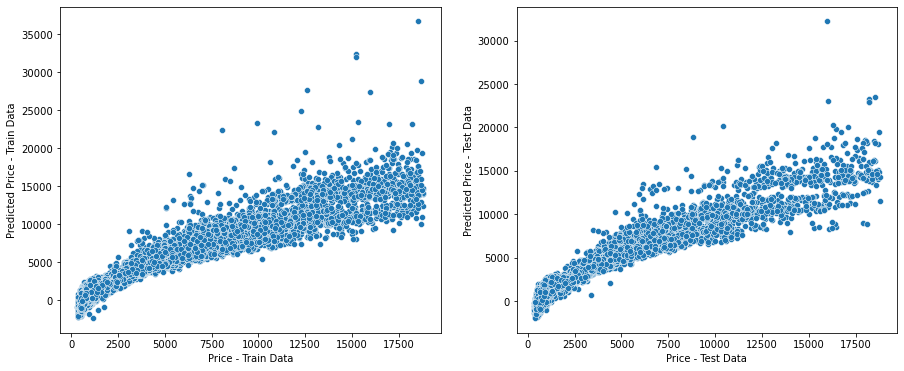

In [527]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(y_train, regression_model.predict(X_train));
plt.xlabel('Price - Train Data',fontsize=10)
plt.ylabel('Predicted Price - Train Data',fontsize=10)
plt.subplot(1,2,2)
sns.scatterplot(y_test, regression_model.predict(X_test));
plt.xlabel('Price - Test Data',fontsize=10)
plt.ylabel('Predicted Price - Test Data',fontsize=10)

In [528]:
for i in num_cols:
    lratio,uratio=outlier_values(df[i])
    df[i]=np.where(df[i]>uratio, uratio, df[i])
    df[i]=np.where(df[i]<lratio, lratio, df[i])

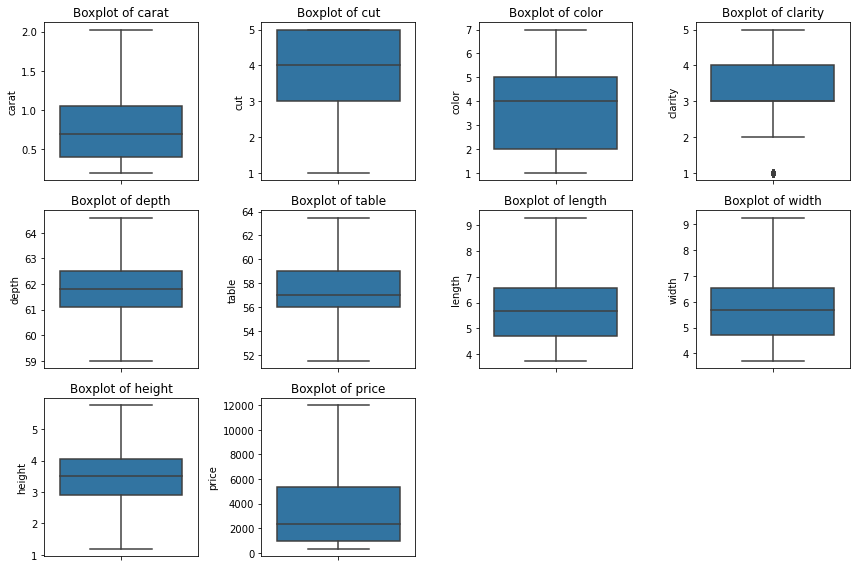

In [529]:
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [530]:
#scaling
from scipy.stats import zscore
df_scaled = df.apply(zscore)

In [531]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,-2.106922e-16,1.000019,-1.283866,-0.851076,-0.201891,0.555491,2.665341
cut,26933.0,1.225747e-16,1.000019,-2.613949,-0.817237,0.081120,0.979476,0.979476
color,26933.0,2.957654e-16,1.000019,-1.527217,-0.940999,0.231435,0.817653,1.990088
clarity,26933.0,-5.163961e-16,1.000019,-2.612272,-0.250212,-0.250212,0.930818,2.111848
depth,26933.0,1.420076e-16,1.000019,-2.256126,-0.532668,0.041817,0.616303,2.339761
table,26933.0,-9.184186e-16,1.000019,-2.751657,-0.665503,-0.201914,0.725266,2.811420
length,26933.0,-2.094143e-16,1.000019,-1.776344,-0.905762,-0.035179,0.728801,3.180645
width,26933.0,-4.864403e-16,1.000019,-1.808742,-0.905054,-0.028208,0.723375,3.166017
height,26933.0,8.447143e-17,1.000019,-3.375130,-0.916695,-0.025332,0.722262,3.180698
price,26933.0,-1.777890e-17,1.000019,-0.983187,-0.804705,-0.392381,0.467157,2.374950


In [532]:
X_scaled = df_scaled.drop('price',axis = 1)
y_scaled = df_scaled['price']

In [533]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled, y_scaled, test_size=0.30 , random_state=123)

In [534]:
regression_model = LinearRegression()
regression_model.fit(Xs_train, ys_train)

LinearRegression()

In [535]:
pd.DataFrame(regression_model.coef_, Xs_train.columns, columns=['Coefficients'])

,Coefficients
carat,1.178255
cut,0.032429
color,-0.129520
clarity,-0.190913
depth,0.009280
table,-0.009987
length,-0.465525
width,0.512282
height,-0.180775


In [536]:
regression_model.intercept_

0.00024477173008959747

In [537]:
# Model score - R2 or coeff of determinant
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

-0.95704639244851
-0.9609622060519891


Text(0, 0.5, 'Predicted Price - Test Data')

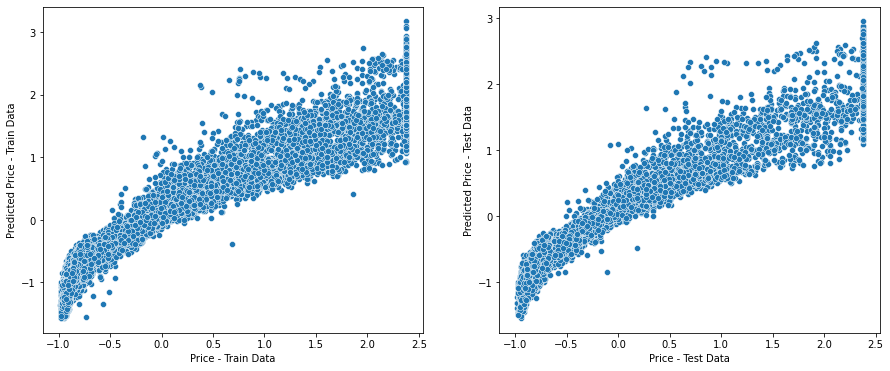

In [538]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(ys_train, regression_model.predict(Xs_train));
plt.xlabel('Price - Train Data',fontsize=10)
plt.ylabel('Predicted Price - Train Data',fontsize=10)
plt.subplot(1,2,2)
sns.scatterplot(ys_test, regression_model.predict(Xs_test));
plt.xlabel('Price - Test Data',fontsize=10)
plt.ylabel('Predicted Price - Test Data',fontsize=10)

In [539]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [540]:
vif = [variance_inflation_factor(X_scaled.values, ix) for ix in range(X_scaled.shape[1])] 

In [541]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"\t",  vif[i])
        i = i+1

carat 	 32.84679067892888
cut 	 1.5107822133294748
color 	 1.1140183060739146
clarity 	 1.213284832392104
depth 	 4.088403121129079
table 	 1.6182274422530742
length 	 410.0261678827866
width 	 392.5910111677994
height 	 205.008784267009


##### ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [542]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
423,0.35,4,7,3,62.4,58.0,5.67,5.64,3.53,949
12816,0.72,4,4,4,62.7,57.0,5.74,5.70,3.59,1764
4813,1.08,5,4,2,61.6,56.0,6.60,6.65,4.08,8347
19483,0.23,3,2,3,62.8,55.0,3.88,3.90,2.44,391
11072,0.27,5,3,1,61.4,57.0,4.17,4.19,2.57,760


In [543]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+length+width+height', data = data_train).fit()
lm1.params

Intercept    11577.556491
carat        10917.373249
cut            108.136872
color         -314.192338
clarity       -899.728238
depth          -85.555598
table          -35.181439
length        -939.946983
width            7.213324
height         -29.033789
dtype: float64

In [544]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.985e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:04:00   Log-Likelihood:            -1.6112e+05
No. Observations:               18853   AIC:                         3.223e+05
Df Residuals:                   18843   BIC:                         3.223e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.158e+04    733.791     15.778      0.0

In [545]:
# RMSE Values on our model
from sklearn.metrics import mean_squared_error
train_err = np.sqrt(mean_squared_error(y_train,lm1.predict(X_train)))
test_err = np.sqrt(mean_squared_error(y_test,lm1.predict(X_test)))

In [546]:
print(train_err, test_err)

1245.039472140442 1226.7855795810626


Text(0, 0.5, 'Predicted Price - Test Data')

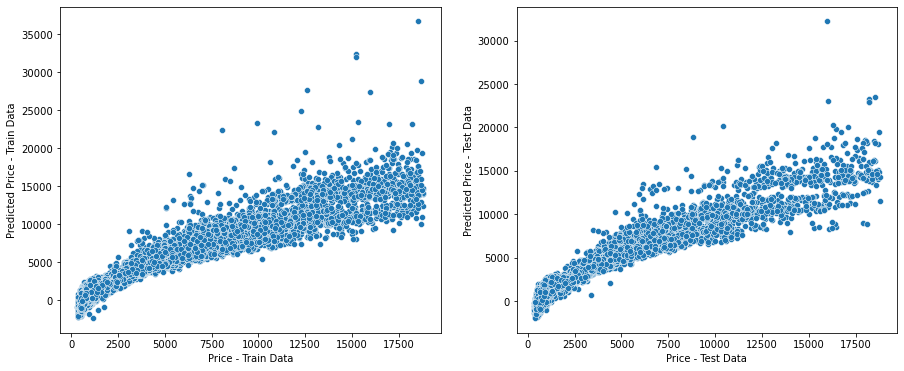

In [547]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(y_train, lm1.predict(X_train));
plt.xlabel('Price - Train Data',fontsize=10)
plt.ylabel('Predicted Price - Train Data',fontsize=10)
plt.subplot(1,2,2)
sns.scatterplot(y_test, lm1.predict(X_test));
plt.xlabel('Price - Test Data',fontsize=10)
plt.ylabel('Predicted Price - Test Data',fontsize=10)

### Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [548]:
trav_df = pd.read_csv("Holiday_Package.csv")

In [549]:
trav_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [550]:
trav_df.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [551]:
trav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [552]:
trav_df.shape

(872, 8)

In [553]:
trav_df.drop('Unnamed: 0',axis = 1, inplace=True)

In [554]:
trav_df.duplicated().sum()

0

In [555]:
trav_df.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [556]:
trav_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [557]:
#Outlier Counts

num_cols = trav_df.select_dtypes(include = ['int64','float64']).columns; # Gives all columns
for i in num_cols:
    ll,ul = outlier_values(trav_df[i])
    oc = trav_df[(trav_df[i]<ll) | (trav_df[i]>ul)][i].count()
    total = trav_df[i].count()
    print("{0}\t{1}\t{2}".format(i,oc,oc*100/total))

Salary	57	6.536697247706422
age	0	0.0
educ	4	0.45871559633027525
no_young_children	207	23.738532110091743
no_older_children	2	0.22935779816513763


In [558]:
from scipy.stats import skew, kurtosis
for i in num_cols:
    print("{0}\t{1}\t{2}".format(i,skew(trav_df[i], nan_policy='omit'), kurtosis(trav_df[i])))

Salary	3.097874889446042	15.754932655434068
age	0.14616002999431685	-0.9116254541773565
educ	-0.04542316723258808	-0.0013468682635431328
no_young_children	1.9431646149708026	3.0852162364752944
no_older_children	0.9523097178138935	0.6652745356501817


#### Data Analysis

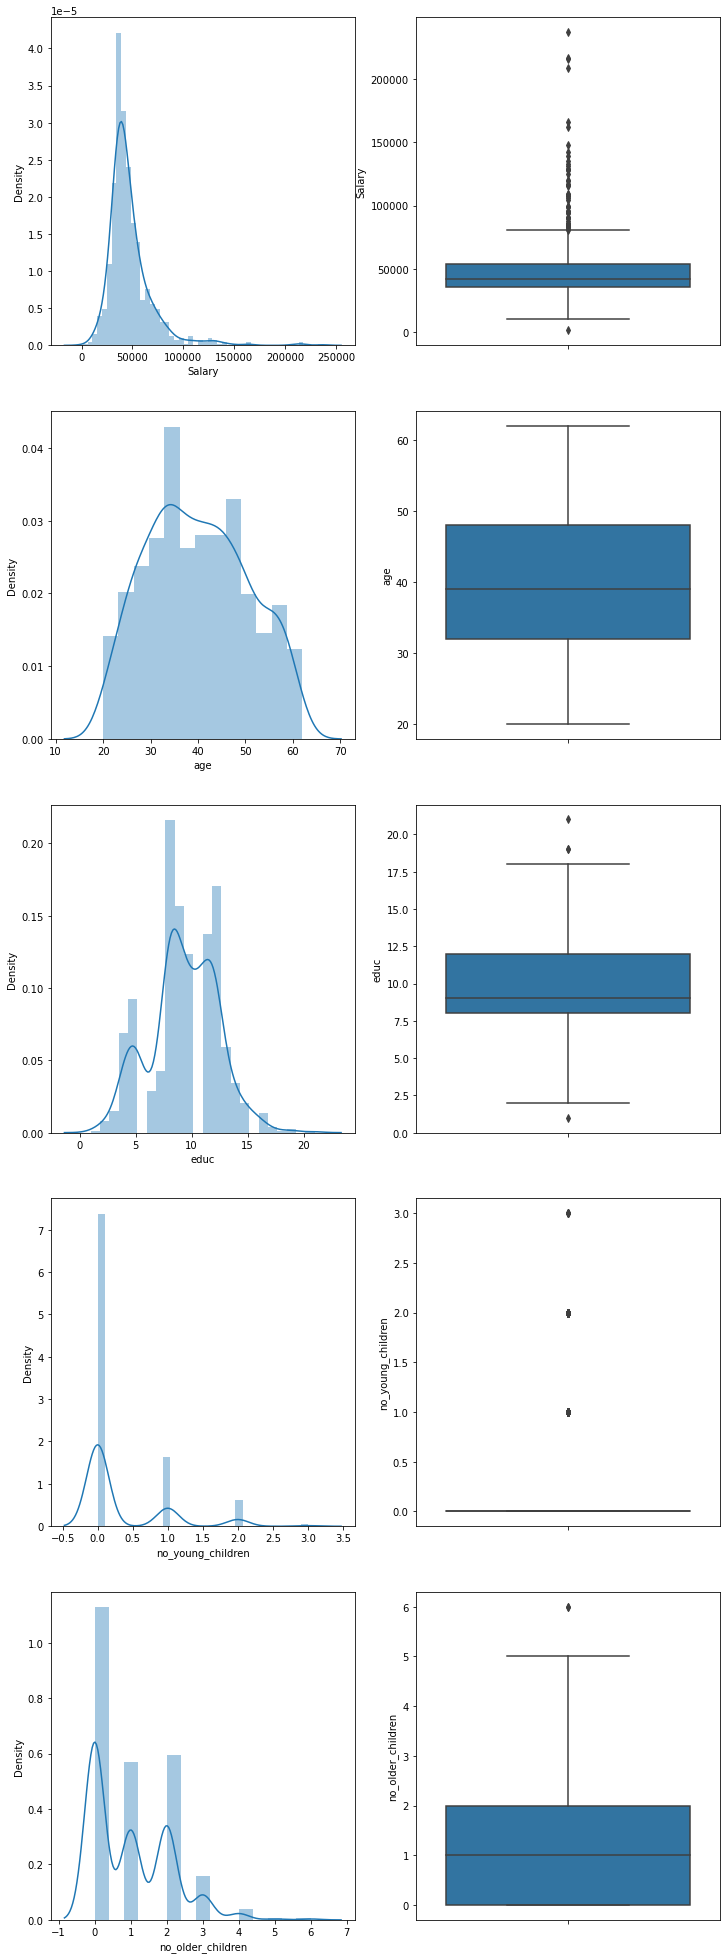

In [559]:
# Univariate Analysis
num_cols = trav_df.select_dtypes(include = ['int64','float64']).columns; # Gives all columns

plt.figure(figsize=(12,35))
for i in range(0,len(num_cols)):
    plt.subplot(5,2,2*i+1)
    sns.distplot(x = trav_df[num_cols[i]], axlabel = num_cols[i]);
    
    plt.subplot(5,2,2*i+2)
    sns.boxplot(y = trav_df[num_cols[i]]);

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64
0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64
no     471
yes    401
Name: Holliday_Package, dtype: int64
no     656
yes    216
Name: foreign, dtype: int64


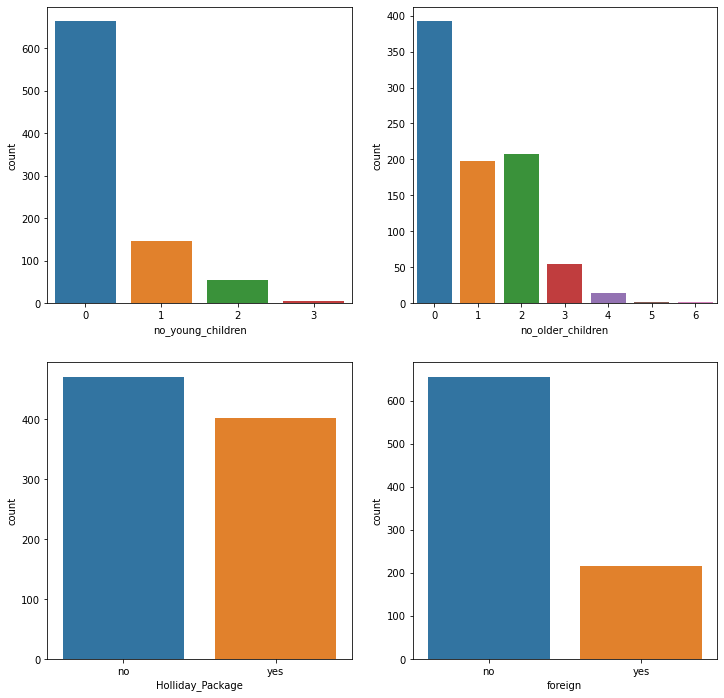

In [560]:
# Univariate Analysis
cat_cols = ['no_young_children','no_older_children','Holliday_Package','foreign'] # Gives all columns

plt.figure(figsize=(12,12))
for i in range(0,len(cat_cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(trav_df[cat_cols[i]]);
    print(trav_df[cat_cols[i]].value_counts())

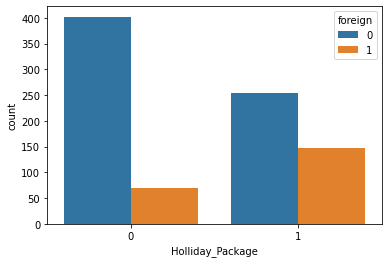

In [620]:
sns.countplot(trav_df['Holliday_Package'],hue=trav_df['foreign']);

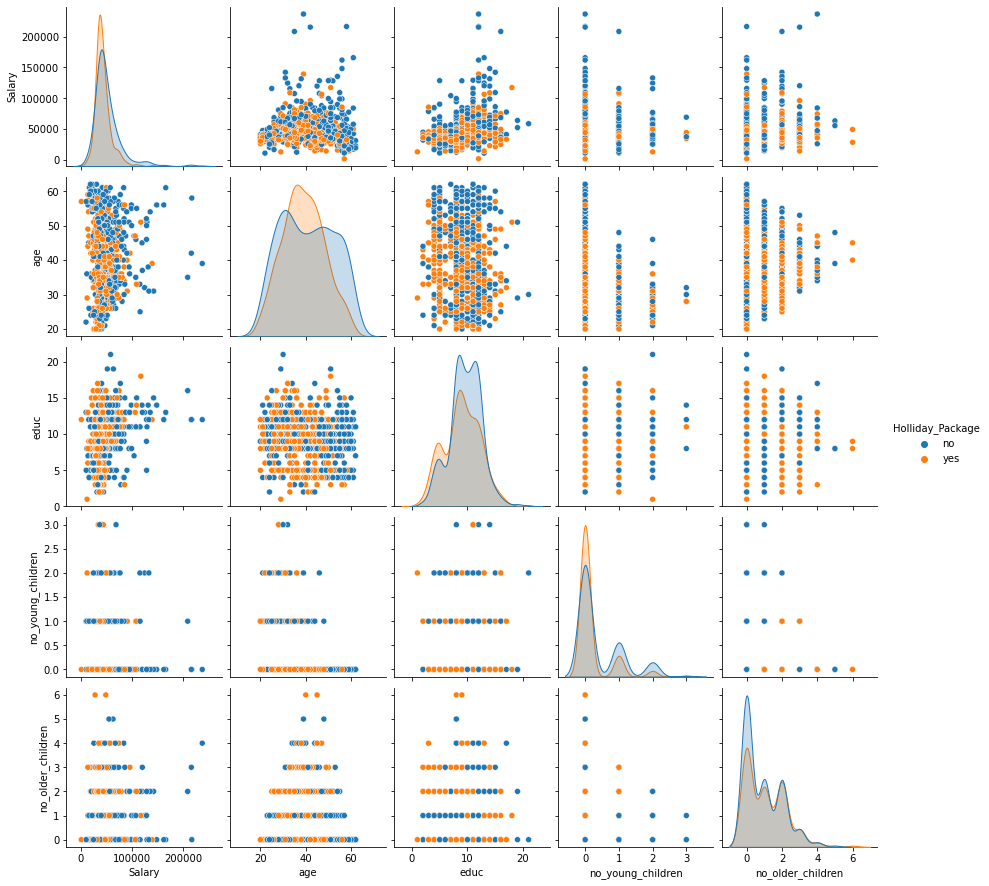

In [561]:
sns.pairplot(diag_kind='kde', data = trav_df, hue='Holliday_Package');

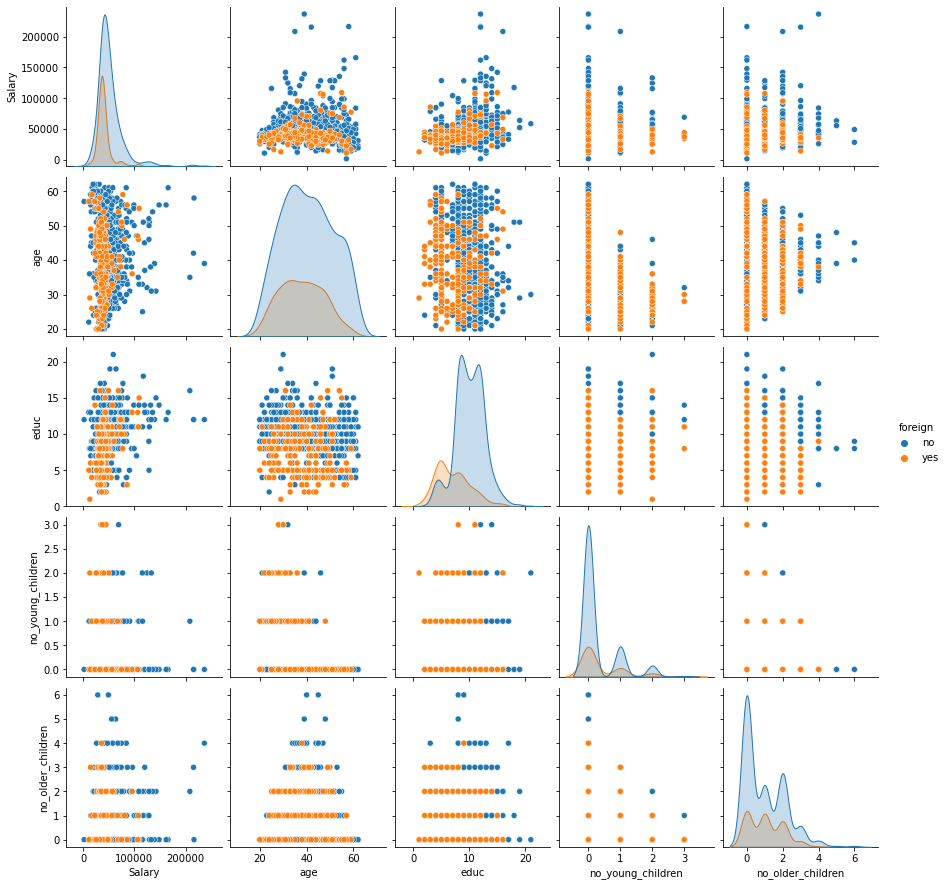

In [562]:
sns.pairplot(diag_kind='kde', data = trav_df, hue='foreign');

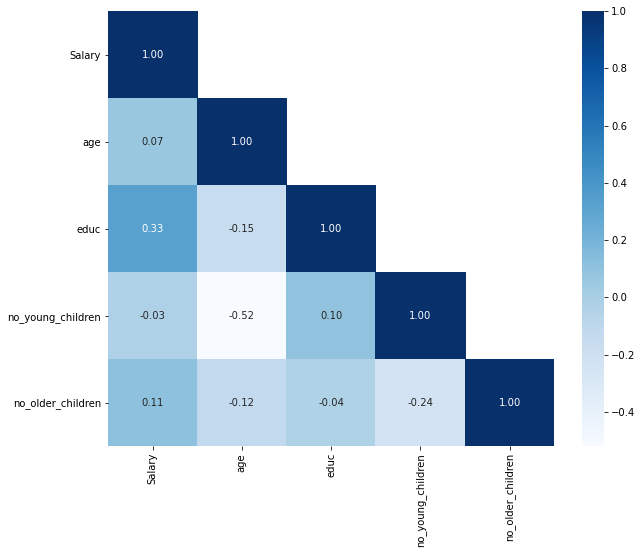

In [563]:
corr = trav_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt = '.2f', mask = np.triu(corr,+1), cmap='Blues');

In [564]:
trav_df['Holliday_Package']=np.where(trav_df['Holliday_Package'] =='yes', '1', '0')
trav_df['foreign']=np.where(trav_df['foreign'] =='yes', '1', '0')

In [565]:
trav_df.foreign.value_counts()

0    656
1    216
Name: foreign, dtype: int64

In [566]:
trav_df.Holliday_Package.value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [567]:
trav_df.Holliday_Package.value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [568]:
X = trav_df.drop('Holliday_Package',axis = 1)
Y = trav_df['Holliday_Package']

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

In [570]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [571]:
model.score(X_train, y_train)

0.5475409836065573

In [572]:
model.score(X_test, y_test)

0.5

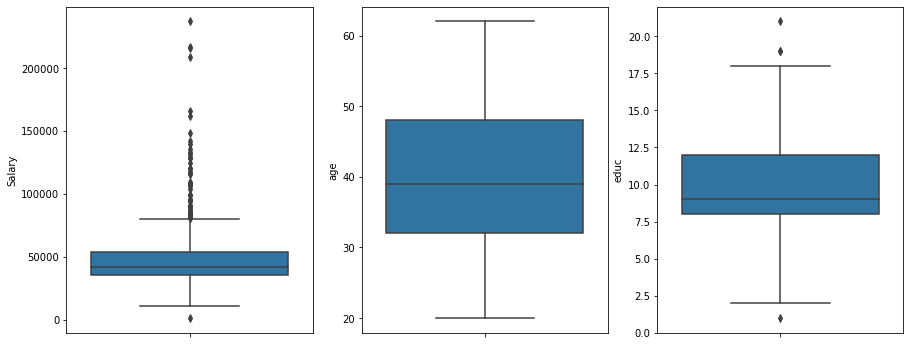

In [573]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y = trav_df['Salary'], data = trav_df)
plt.subplot(1,3,2)
sns.boxplot(y = trav_df['age'], data = trav_df)
plt.subplot(1,3,3)
sns.boxplot(y = trav_df['educ'], data = trav_df);

In [574]:
for i in ['Salary','educ']:
    lratio,uratio=outlier_values(trav_df[i])
    trav_df[i]=np.where(trav_df[i]>uratio, uratio, trav_df[i])
    trav_df[i]=np.where(trav_df[i]<lratio, lratio, trav_df[i])

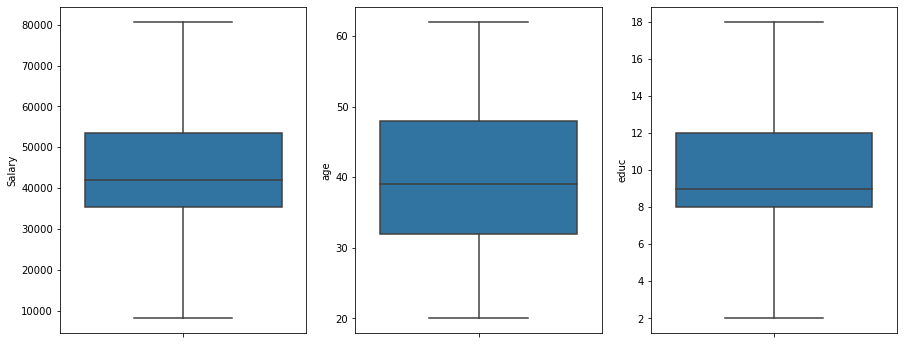

In [575]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y = trav_df['Salary'], data = trav_df)
plt.subplot(1,3,2)
sns.boxplot(y = trav_df['age'], data = trav_df)
plt.subplot(1,3,3)
sns.boxplot(y = trav_df['educ'], data = trav_df);

In [576]:
X = trav_df.drop('Holliday_Package',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=123)

In [577]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [578]:
model.score(X_train, y_train)

0.5426229508196722

In [579]:
model.score(X_test, y_test)

0.5343511450381679

In [580]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [581]:
from sklearn.model_selection import GridSearchCV

In [582]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [583]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [584]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [585]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [586]:
best_model = grid_search.best_estimator_

In [587]:
best_model.score(X_train, y_train)

0.5409836065573771

In [588]:
best_model.score(X_test, y_test)

0.5381679389312977

In [589]:
pd.DataFrame(best_model.coef_[0], X_train.columns, columns=['Coefficients'])

,Coefficients
Salary,-0.000007
age,0.001410
educ,0.000388
no_young_children,-0.000193
no_older_children,0.000260
foreign,0.000166


In [590]:
best_model.intercept_[0]

7.285464943947243e-05

In [591]:
x_predict = best_model.predict(X_train)
y_predict = best_model.predict(X_test)

In [592]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

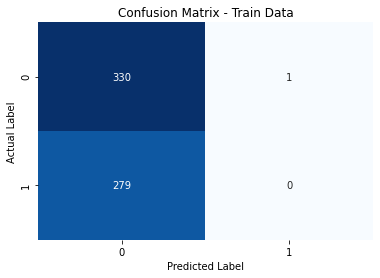

In [593]:
sns.heatmap(confusion_matrix(y_train,x_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

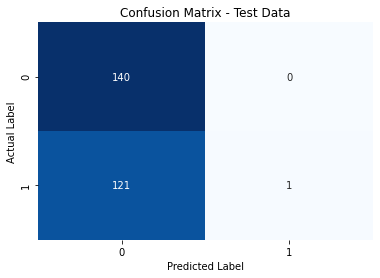

In [594]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [595]:
print(classification_report(y_train, x_predict))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       331
           1       0.00      0.00      0.00       279

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610



In [596]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       140
           1       1.00      0.01      0.02       122

    accuracy                           0.54       262
   macro avg       0.77      0.50      0.36       262
weighted avg       0.75      0.54      0.38       262



In [597]:
pred_prob_train = best_model.predict_proba(X_train)
pred_prob_test = best_model.predict_proba(X_test)

In [598]:
max_f1 = 0
cust_prob = 0
for j in np.arange(0.10,1,0.05):
    custom_prob = j 
    custom_cutoff_data=[] 
    for i in range(0,len(y_train)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a='1'
        else:
            a='0'
        custom_cutoff_data.append(a)
    if(f1_score(y_train, custom_cutoff_data,average='weighted') > max_f1):
        max_f1 = f1_score(y_train, custom_cutoff_data,average='weighted')
        cutoff_data = custom_cutoff_data
        cust_prob = j

In [599]:
print(classification_report(y_train, cutoff_data))

              precision    recall  f1-score   support

           0       0.59      0.76      0.67       331
           1       0.57      0.38      0.46       279

    accuracy                           0.59       610
   macro avg       0.58      0.57      0.56       610
weighted avg       0.58      0.59      0.57       610



In [600]:
max_f1 = 0
cust_prob = 0
for j in np.arange(0.10,1,0.05):
    custom_prob = j 
    custom_cutoff_data=[] 
    for i in range(0,len(y_test)):
        if np.array(pred_prob_test[:,1])[i] > custom_prob:
            a='1'
        else:
            a='0'
        custom_cutoff_data.append(a)
    if(f1_score(y_test, custom_cutoff_data,average='weighted') > max_f1):
        max_f1 = f1_score(y_test, custom_cutoff_data,average='weighted')
        cutoff_data = custom_cutoff_data
        cust_prob = j

In [601]:
print(classification_report(y_test, cutoff_data))

              precision    recall  f1-score   support

           0       0.58      0.70      0.63       140
           1       0.55      0.42      0.47       122

    accuracy                           0.57       262
   macro avg       0.56      0.56      0.55       262
weighted avg       0.57      0.57      0.56       262



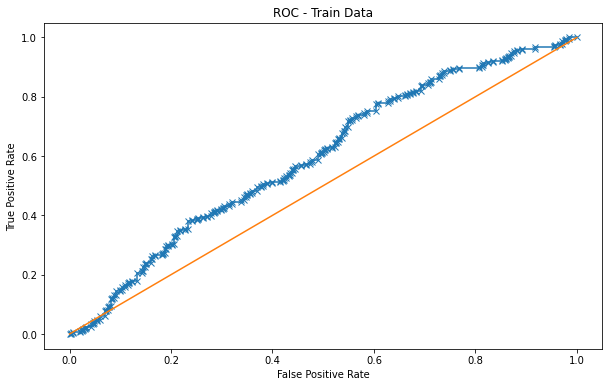

Area under Curve is 0.5960865845867308


In [602]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr, threshold = roc_curve(y_train,pred_prob_train[:,1],pos_label='1')
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,pred_prob_train[:,1],average = 'weighted'))

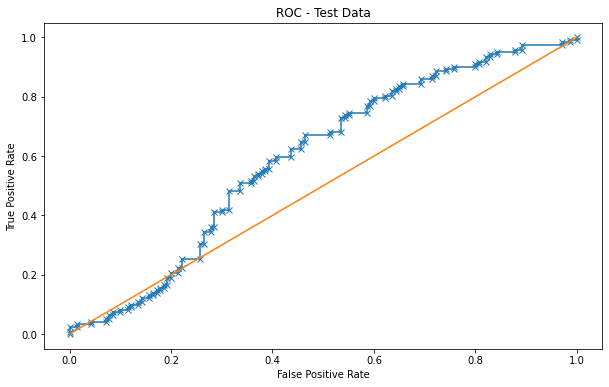

Area under Curve is 0.595784543325527


In [603]:

rf_fpr, rf_tpr, threshold = roc_curve(y_test,pred_prob_test[:,1],pos_label='1')
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Data')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,pred_prob_test[:,1],average = 'weighted'))

In [604]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)

In [605]:
x_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [606]:
print("Train Data Score {0}".format(model.score(X_train, y_train)))
print("Test Data Score {0}".format(model.score(X_test, y_test)))

Train Data Score 0.6655737704918033
Test Data Score 0.683206106870229


In [607]:
pd.DataFrame(model.coef_[0], X_train.columns, columns=['Coefficients'])

,Coefficients
Salary,-0.000021
age,-0.049215
educ,0.038756
no_young_children,-1.236254
no_older_children,-0.016823
foreign,1.350785


In [608]:
model.intercept_[0]

2.4388537812123987

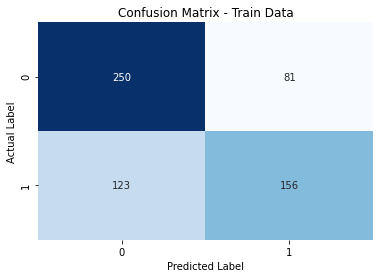

In [609]:
sns.heatmap(confusion_matrix(y_train,x_pred),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data');

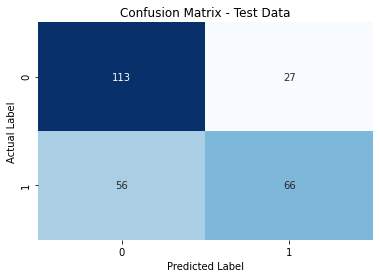

In [610]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data');

In [611]:
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       331
           1       0.66      0.56      0.60       279

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610



In [612]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73       140
           1       0.71      0.54      0.61       122

    accuracy                           0.68       262
   macro avg       0.69      0.67      0.67       262
weighted avg       0.69      0.68      0.68       262



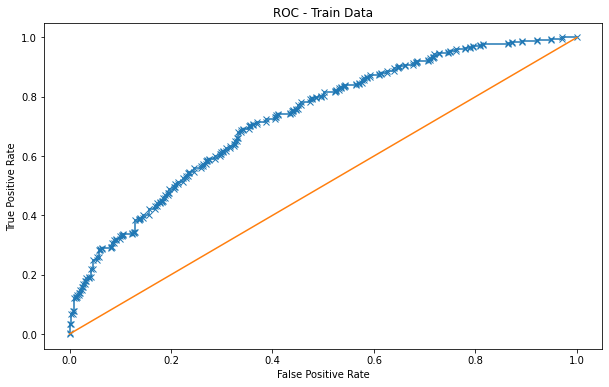

Area under Curve is 0.7285623017033211


In [613]:
rf_fpr, rf_tpr, threshold = roc_curve(y_train,model.predict_proba(X_train)[:,1], pos_label='1')
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Linear Discriminant Analysis')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train Data')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,model.predict_proba(X_train)[:,1]))

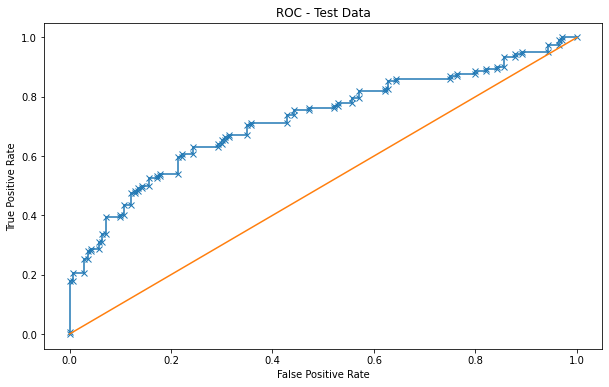

Area under Curve is 0.7223653395784544


In [614]:
rf_fpr, rf_tpr, threshold = roc_curve(y_test,model.predict_proba(X_test)[:,1], pos_label='1')
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Linear Discriminant Analysis')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Data')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

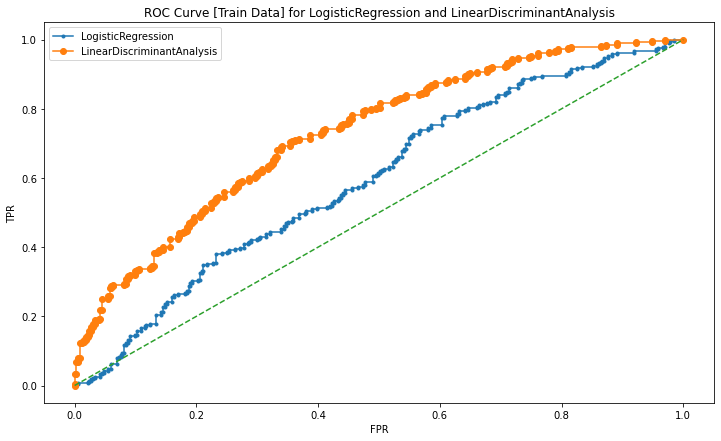

In [617]:
# Train Data

models_names={best_model:'LogisticRegression',model:'LinearDiscriminantAnalysis'}

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_train, pred_prob_train[:,1],pos_label='1')
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1],pos_label='1')
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve [Train Data] for LogisticRegression and LinearDiscriminantAnalysis')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

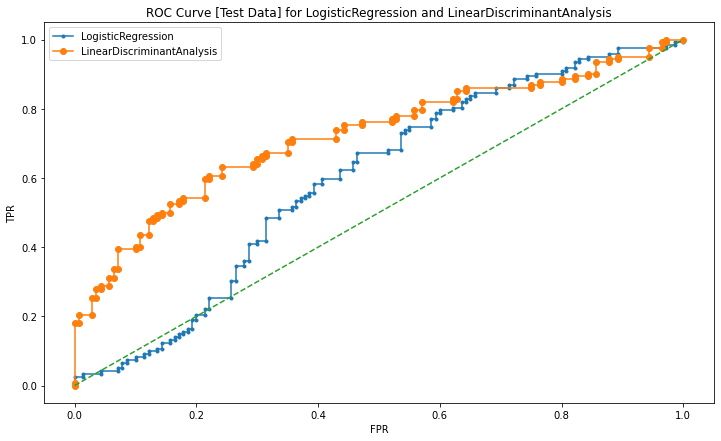

In [618]:
# Train Data

models_names={best_model:'LogisticRegression',model:'LinearDiscriminantAnalysis'}

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, pred_prob_test[:,1],pos_label='1')
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],pos_label='1')
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve [Test Data] for LogisticRegression and LinearDiscriminantAnalysis')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()